In [ ]:
'''
[X]- find dataset (**mental health corpus or genius lyrics corpus)
[X]- preprocess scraped data
[X]- divide into train/test
[X]- create graph showing distribution of target classes
[X]- describe dataset and what the model should be able to predict
- evalute models on test data
  - sequential model 
  - RNN
  - CNN
  - etc (?)
  - embedding approaches
- write up analysis of performance of various approaches
- accuracy does not determine grade -> quality of analysis determines grade
'''

In [ ]:
# some necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd
# set seed for reproducibility
np.random.seed(1234)

# set up import from local file
from google.colab import files
uploaded = files.upload()


Saving song_lyrics_trimmed.xlsx to song_lyrics_trimmed.xlsx


In [ ]:
import csv
# title, tag, artist, year, views, features, lyrics, id, language_cld3, language_ft, language
df = pd.read_excel('song_lyrics_trimmed.xlsx')
print('rows and columns:', df.shape)
df.head()

rows and columns: (2499, 11)


,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


In [ ]:
# clean data (no duplicates and NaN)
df.drop_duplicates(inplace=True)
no_of_nan_values=df.isna().sum().sum()
print(no_of_nan_values)

13


In [ ]:
df['text_word_count']=df['lyrics'].apply(lambda x:len(x.split()))
print(type(df['text_word_count']))
print(df['text_word_count'])

<class 'pandas.core.series.Series'>
0       762
1       548
2       574
3       760
4       432
       ... 
2494    541
2495    114
2496    574
2497    372
2498    332
Name: text_word_count, Length: 2499, dtype: int64


In [ ]:
# text preprocessing
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

#print(df.lyrics[2])
# for val in df['lyrics'].values:
#   new_val = re.sub("\n"," ",val)
#   new_val = re.sub("[\(\[].*?[\)\]]", "", val)
#   df.replace(val, new_val)
#print(df.at[2, 'lyrics'])
for i in range(1, 2499):
  val = df.at[i, 'lyrics']
  new_val = re.sub("\n"," ", val)
  new_val = re.sub("[\(\[].*?[\)\]]", "", val)
  df.at[i, 'lyrics'] = new_val
#print(df.at[2, 'lyrics'])

stopwords = set(stopwords.words('english'))
#vectorizer = TfidfVectorizer(stop_words=list(stopwords))
vectorizer_b = TfidfVectorizer(stop_words=list(stopwords), binary=True)
# .{column names}
X = df.lyrics   #features
print(type(X))
Y = df.tag  #targets
print(type(Y))
X.head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


0    [Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...
1    \n\n\nYeah, hah, yeah, Roc-A-Fella\nWe invite ...
2    Maybe cause I'm eatin\nAnd these bastards fien...
3    \n\n\nUgh, Killa!\nBaby!\nKanye, this that 197...
4    \nSo they ask me\n"Young boy\nWhat you gon' do...
Name: lyrics, dtype: object

In [ ]:
# divide into train/test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, train_size=0.75, random_state=1234)
X_train.shape

(1874,)

In [ ]:
# apply tfidf vectorizer
X_train_list = X_train.values.astype('U').tolist()
X_test_list = X_test.values.astype('U').tolist()
X_train = vectorizer_b.fit_transform(X_train_list)  # fit and transform the train data
X_test = vectorizer_b.transform(X_test_list)        # transform only the test data

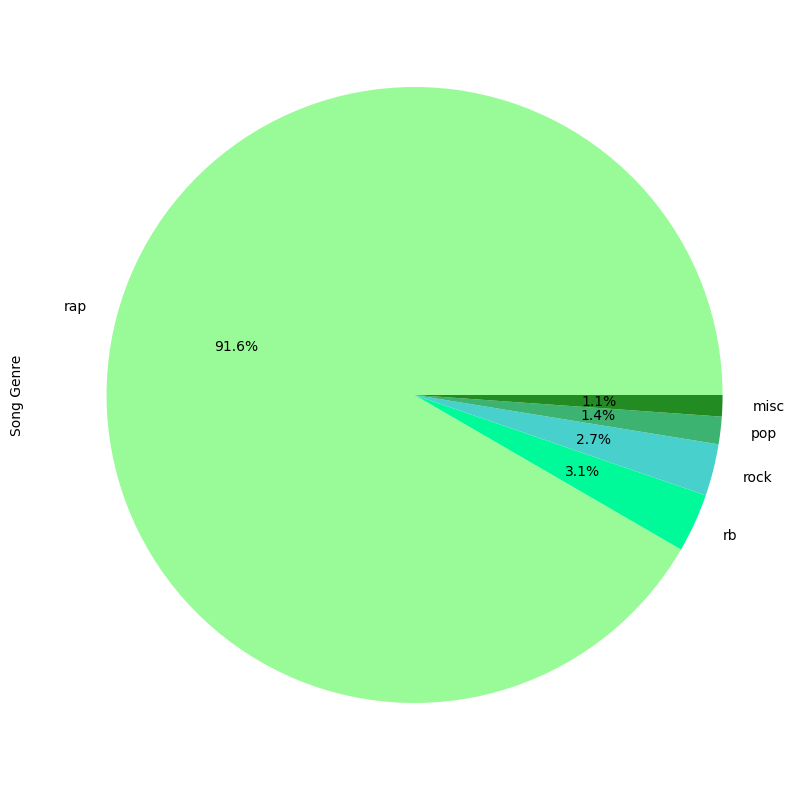

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

label=df['tag'].unique()
#print(label)
plt.figure(figsize=(10,10))
#colors = [sb.color_palette('pastel')[0], sb.color_palette('pastel')[4]]
colors = ['palegreen','mediumspringgreen','mediumturquoise', 'mediumseagreen', 'forestgreen']
plt.pie(df['tag'].value_counts(),labels=label,autopct='%.1f%%',colors=colors);
plt.ylabel('Song Genre');

# for name, group in df.groupby(level=0):
#     group.index = group.index.droplevel(0)
#     group.plot.pie(autopct='%1.1f%%', shadow=True, startangle=140)

## Describe dataset and what the model should be able to predict:

This dataset contains song lyrics scraped from Genius and consists of 11 columns. The relevant columns are the 'lyrics' and the 'tag' columns because I will be analyzing the lyrics to predict the genre of the song. The dataset is very unbalanced, but hopefully this will still yield a meaaningful analysis of different ML models.

In [ ]:
'''
- evalute models on test data
  [X]- sequential model 
  - RNN
  - CNN
  - etc (?)
  - embedding approaches
'''

## Sequential Model

In [ ]:
# run first cell for imports

# split into train and test
i = np.random.rand(len(df)) < 0.75
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

# fit model
num_labels = 5
vocab_size = 2500
batch_size = 85

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.lyrics)

x_train = tokenizer.texts_to_matrix(train.lyrics, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.lyrics, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.tag)
y_train = encoder.transform(train.tag)
y_test = encoder.transform(test.tag)


model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

train data size:  (1887, 12)
test data size:  (612, 12)
Epoch 1/30
20/20 [==============================] - 1s 15ms/step - loss: -2.7248 - accuracy: 0.0259 - val_loss: -7.0787 - val_accuracy: 0.0265
Epoch 2/30
20/20 [==============================] - 0s 7ms/step - loss: -15.5515 - accuracy: 0.0271 - val_loss: -23.8892 - val_accuracy: 0.0265
Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: -40.6832 - accuracy: 0.0271 - val_loss: -53.6545 - val_accuracy: 0.0265
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: -81.5667 - accuracy: 0.0271 - val_loss: -98.6244 - val_accuracy: 0.0265
Epoch 5/30
20/20 [==============================] - 0s 7ms/step - loss: -140.3082 - accuracy: 0.0271 - val_loss: -161.3643 - val_accuracy: 0.0265
Epoch 6/30
20/20 [==============================] - 0s 7ms/step - loss: -219.4699 - accuracy: 0.0271 - val_loss: -242.8314 - val_accuracy: 0.0265
Epoch 7/30
20/20 [==============================] - 0s 7ms/step - loss: -319.

In [ ]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

8/8 [==============================] - 0s 3ms/step - loss: -8965.6670 - accuracy: 0.0278
Accuracy:  0.02777777798473835


## RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

max_features = 10000
maxlen = 500
batch_size = 32

# load the data
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=max_features)

# pad the data to maxlen
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step
